<a href="https://colab.research.google.com/github/2series/100_Days_of_ML_Code/blob/master/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install analytics

    100% |████████████████████████████████| 71kB 4.2MB/s 
    100% |████████████████████████████████| 235kB 5.9MB/s 
  Running setup.py bdist_wheel for analytics ... - done
  Stored in directory: /root/.cache/pip/wheels/11/3c/13/254478b18c6b5343f1c76c4ce9517ee2feedcb0672911d2fbc
  Running setup.py bdist_wheel for nydus ... - done
  Stored in directory: /root/.cache/pip/wheels/9f/4a/04/d2c412106518a5f83ba1ba06a9f223b32af40099f1ed87ec58
  Running setup.py bdist_wheel for python-dateutil ... - done
  Stored in directory: /root/.cache/pip/wheels/3e/57/ae/3a3f171dc8c46ac987fa8d7a56fcc19d82ff1a7151cf46a228
Successfully built analytics nydus python-dateutil
pandas 0.22.0 has requirement python-dateutil>=2, but you'll have python-dateutil 1.5 which is incompatible.
matplotlib 2.1.2 has requirement python-dateutil>=2.1, but you'll have python-dateutil 1.5 which is incompatible.
jupyter-client 5.2.3 has requirement python-dateutil>=2.1, but you'll have python-dateutil 1.5 which is incompat

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [3]:
from google.colab import files
files.upload()

Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN.csv
Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


{'test_Y3wMUE5_7gLdaTN.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area\r\nLP001015,Male,Yes,0,Graduate,No,5720,0,110,360,1,Urban\r\nLP001022,Male,Yes,1,Graduate,No,3076,1500,126,360,1,Urban\r\nLP001031,Male,Yes,2,Graduate,No,5000,1800,208,360,1,Urban\r\nLP001035,Male,Yes,2,Graduate,No,2340,2546,100,360,,Urban\r\nLP001051,Male,No,0,Not Graduate,No,3276,0,78,360,1,Urban\r\nLP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152,360,1,Urban\r\nLP001055,Female,No,1,Not Graduate,No,2226,0,59,360,1,Semiurban\r\nLP001056,Male,Yes,2,Not Graduate,No,3881,0,147,360,0,Rural\r\nLP001059,Male,Yes,2,Graduate,,13633,0,280,240,1,Urban\r\nLP001067,Male,No,0,Not Graduate,No,2400,2400,123,360,1,Semiurban\r\nLP001078,Male,No,0,Not Graduate,No,3091,0,90,360,1,Urban\r\nLP001082,Male,Yes,1,Graduate,,2185,1516,162,360,1,Semiurban\r\nLP001083,Male,No,3+,Graduate,No,4166,0,40,180,,Urban\r\nLP001094,Male,Yes,2

In [0]:
#Read dataset
train=pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
test=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

**Total Income **- As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

**EMI** - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

**Balance Income **- This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.


In [0]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

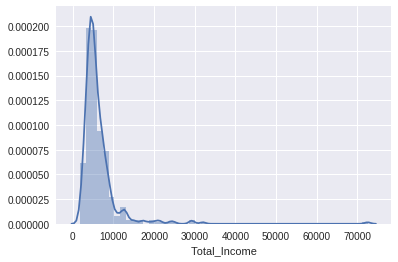

In [6]:
#Let’s check the distribution of Total Income
sns.distplot(train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. 

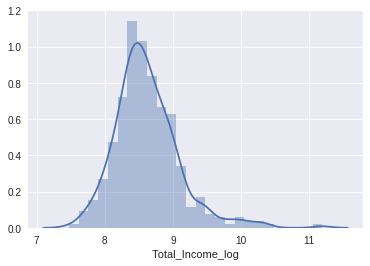

In [7]:
#Let’s take the log transformation to make the distribution normal
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

In [0]:
#Let’s create the EMI feature now
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: ignored

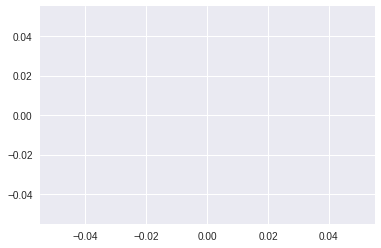

In [9]:
#Let’s check the distribution of EMI variable
sns.distplot(train['EMI']);

In [0]:
#Let us create Balance Income feature and check its distribution
train['Balance Income']=train['Total_Income']-(train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


ValueError: ignored

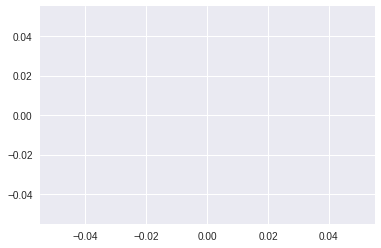

In [11]:
sns.distplot(train['Balance Income']);